# k-Nearest Neighbors classification
As usual, we import the libraries:

In [0]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
import operator
%matplotlib inline

## Load dataset


In [0]:
def load_dataset(split):

    dataset = datasets.load_iris()
    X, y = dataset['data'], dataset['target']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123, test_size=(1 - split))
    
    return X_train, X_test, y_train, y_test

In [0]:
# prepare data
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)

## Plot dataset
Since the data has 4 features, 16 scatterplots (4x4) are plotted showing the dependencies between each pair of features.

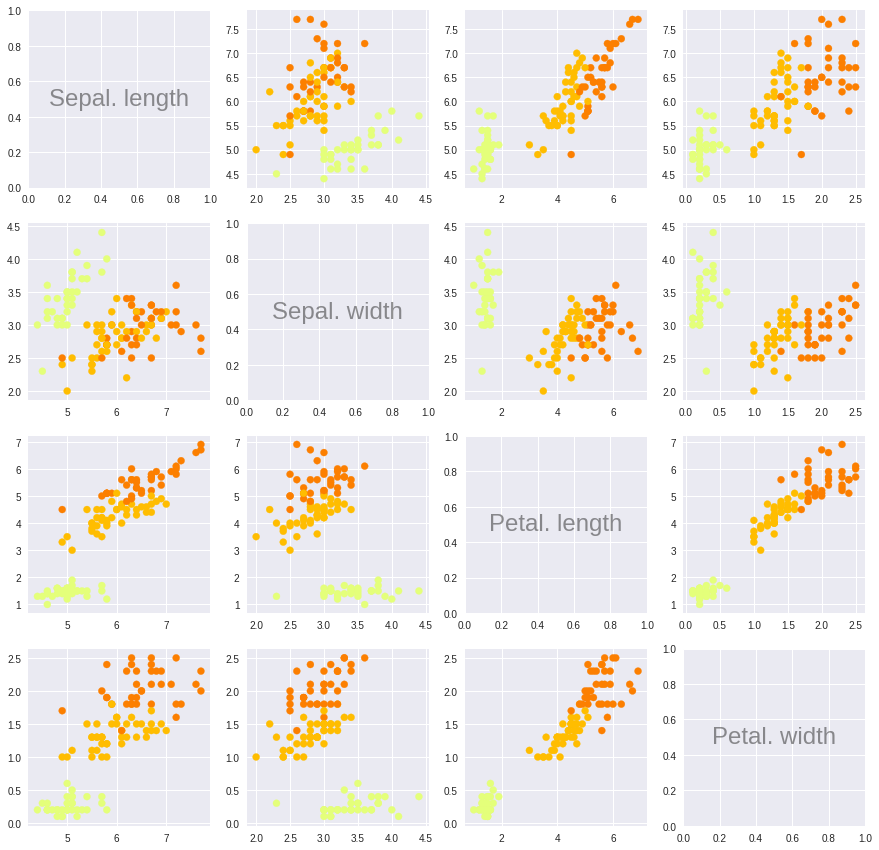

In [9]:
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(X_train[:,j],X_train[:,i], c=y_train, cmap=plt.cm.Wistia)

## Euclidean distance
Compute Euclidean distance between two data points.

In [0]:
def euclidean_distance(x1, x2):
  
    distance = 0
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
        
    return np.sqrt(distance)

## Get the labels
Get the labels of the *k* nearest neighbors of the datapoint *x_new*.

In [0]:
def get_neighbors_labels(X_train, y_train, x_new, k):
  
    list_dist = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_new, X_train[i])
        list_dist.append((X_train[i], y_train[i], dist))
    list_dist.sort(key=operator.itemgetter(2))
    neighbors = []
    for i in range(k):
        neighbors.append(list_dist[i])
    neighbors_names = []
    for i in range(k):
        neighbors_names.append(neighbors[i][1])
    return neighbors
    neighbors_labels = []
    for i in range(k):
        name_number = neighbors_names[i]
        if name_number == 0:
            name = "setosa"
        elif name_number == 1:
            name = "versicolor"
        elif name_number == 2:
            name = "virginica"
        neighbors_labels.append(name)
        
    return neighbors_labels, neighbors_names


## Get the majority label
For the previously computed labels of the *k* nearest neighbors, compute the actual response. I.e. give back the class of the majority of nearest neighbors. In case of a tie, choose the "lowest" label (i.e. the order of tie resolutions is 0 > 1 > 2).

In [0]:
def get_response(neighbors_labels, num_classes=3):

    classVotes = np.zeros(num_classes )
    for n in neighbors_labels:
        response = n[-2]
        classVotes[response] += 1
    y = np.argwhere(classVotes == classVotes.max())
    if len(y) > 1:
        y = neighbors[0][-2]
    else:
        y = y[0][0]
        
    return y

## Compute accuracy
Compute the accuracy of the generated predictions.

In [0]:
def compute_accuracy(y_pred, y_test):
  
    accuracy = np.mean(np.equal(y_pred, y_test))
    
    return accuracy

# Generate predictions

In [0]:
def predict(X_train, y_train, X_test, k):

    y_pred = []
    for x_new in X_test:
        neighbors = get_neighbors_labels(X_train, y_train, x_new, k)
        y_pred.append(get_response(neighbors))
        
    return y_pred

## Testing


In [18]:
# prepare data
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)
print('Training set: {0} samples'.format(X_train.shape[0]))
print('Test set: {0} samples'.format(X_test.shape[0]))

# generate predictions
k = 3
y_pred = predict(X_train, y_train, X_test, k)
accuracy = compute_accuracy(y_pred, y_test)
print('Accuracy = {0}'.format(accuracy))

Training set: 112 samples
Test set: 38 samples
Accuracy = 0.9473684210526315


# Accuracy = 0.9473684210526315